In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('/content/Retail_Customer.csv')

# Convert 'Visit_Date' column to datetime
df['Visit_Date'] = pd.to_datetime(df['Visit_Date'])

# Calculate the reference date (last date of 5th week)
reference_date = df['Visit_Date'].max() - pd.DateOffset(weeks=5)

# Filter data based on the reference date
feature_set = df[df['Visit_Date'] >= reference_date]

feature_set = feature_set[['CustomerID', 'Total_Purchases_In_USD']]

# Print the processed feature set
print(feature_set.head())

   CustomerID  Total_Purchases_In_USD
0   104790628                   51.36
1     6927608                   77.04
2  1078961990                   85.60
3  1034571766                   85.60
4  1094103886                   51.36


new dataset

In [2]:
# Load the provided CSV file containing the data
data = pd.read_csv('/content/Retail_Customer.csv')



Making New Features

In [3]:
# Function to calculate total revenue for each customer
def calculate_total_revenue(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].sum()

# Function to calculate maximum purchase in a day for each customer
def calculate_max_purchase_in_a_day(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].max()

# Function to calculate minimum purchase in a day for each customer
def calculate_min_purchase_in_a_day(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].min()

# Function to calculate total visit days for each customer
def calculate_total_visit_days(df):
    return df.groupby('CustomerID').size()

# Function to calculate standard deviation in sales for each customer
def calculate_standard_deviation_in_sales(df):
    return df.groupby('CustomerID')['Total_Purchases_In_USD'].std()

# Now we'll apply these functions to our dataset
new_features = pd.DataFrame({
    'CUSTOMER_ID': data['CustomerID'].unique(),
    'Total_Revenue': calculate_total_revenue(data),
    'Max_Purchase_In_A_Day': calculate_max_purchase_in_a_day(data),
    'Min_Purchase_In_A_Day': calculate_min_purchase_in_a_day(data),
    'Total_Visit_Days': calculate_total_visit_days(data),
    'Standard_Deviation_In_Sales': calculate_standard_deviation_in_sales(data)
})

# Step 4: Save the new features along with the existing data into a new CSV file
merged_data = pd.merge(data, new_features, left_on='CustomerID', right_on='CUSTOMER_ID', how='left')
merged_data.to_csv('new_data_with_features.csv', index=False)


Pre-Processing the data

In [4]:
print(data.describe())

         CustomerID  Total_Purchases_In_USD
count  8.708110e+05           870811.000000
mean   5.874357e+08              135.710042
std    4.831621e+08              161.098219
min    4.880000e+02                0.000000
25%    8.845767e+07               77.040000
50%    7.439495e+08               85.600000
75%    1.079580e+09              171.200000
max    1.208801e+09            34240.000000


Checking Dataset

In [19]:
print(feature_set.head())
print(feature_set.info())

   CustomerID  Total_Purchases_In_USD
0   104790628                   51.36
1     6927608                   77.04
2  1078961990                   85.60
3  1034571766                   85.60
4  1094103886                   51.36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 870811 entries, 0 to 870810
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              870811 non-null  int64  
 1   Total_Purchases_In_USD  870811 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 19.9 MB
None


Highest Spending

In [20]:
# sum of purchases per customer in the last 5 weeks
weekly_purchases = feature_set.groupby('CustomerID')['Total_Purchases_In_USD'].sum()

# customer with the highest purchase
highest_purchase_customer_id = weekly_purchases.idxmax()

# highest purchase amount
highest_purchase_amount = weekly_purchases[highest_purchase_customer_id]

# results
print(f"Customer with ID {highest_purchase_customer_id} had the highest purchase of {highest_purchase_amount:.2f} in the last 5 weeks.")


Customer with ID 1032283346 had the highest purchase of 53414.40 in the last 5 weeks.


Most Valued Customer

In [21]:
print(f"Customer with ID {highest_purchase_customer_id} is the most valued customer with total purchases of {highest_purchase_amount:.2f} in the last 5 weeks.")


Customer with ID 1032283346 is the most valued customer with total purchases of 53414.40 in the last 5 weeks.


Making categories of Customers

In [22]:
# thresholds
poor_threshold = 500
mediocre_threshold = 1000

# new column for customer category
df['Customer_Category'] = 'Unknown'

# Categorize customers based on their spending
feature_set.loc[feature_set['Total_Purchases_In_USD'] < poor_threshold, 'Customer_Category'] = 'Poor'
feature_set.loc[(feature_set['Total_Purchases_In_USD'] >= poor_threshold) & (feature_set['Total_Purchases_In_USD'] < mediocre_threshold), 'Customer_Category'] = 'Mediocre'
feature_set.loc[feature_set['Total_Purchases_In_USD'] >= mediocre_threshold, 'Customer_Category'] = 'Rich'

# customer categories
print(feature_set['Customer_Category'].value_counts())


Poor        852029
Mediocre     16852
Rich          1930
Name: Customer_Category, dtype: int64


Displaying the new dataset


In [23]:
df

,Visit_Date,CustomerID,Total_Purchases_In_USD,Customer_Category
0,2014-09-17,104790628,51.36,Unknown
1,2014-09-17,6927608,77.04,Unknown
2,2014-09-17,1078961990,85.60,Unknown
3,2014-09-17,1034571766,85.60,Unknown
4,2014-09-17,1094103886,51.36,Unknown
...,...,...,...,...
870806,2014-10-19,284103422,171.20,Unknown
870807,2014-10-19,972926064,85.60,Unknown
870808,2014-10-19,100547838,51.36,Unknown
870809,2014-10-19,155665868,171.20,Unknown


Saving the Dataset with added features

In [ ]:
feature_set.to_csv('generated_features.csv', index=False)


Making Histogram for Customer Spending

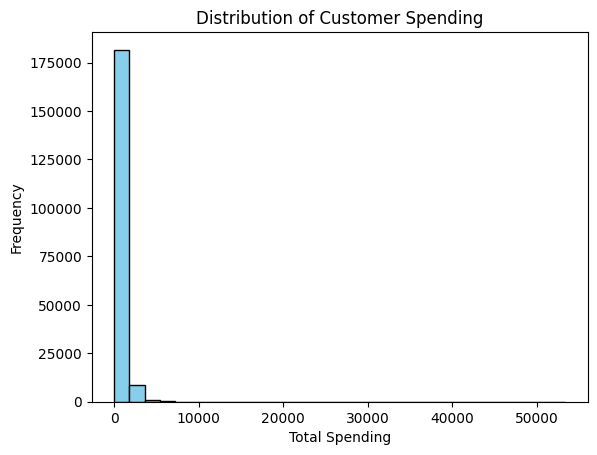

In [ ]:
plt.hist(total_spending, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()


Making a Line Chart for Showing Trend in Sales over the weeks

<ipython-input-31-d3d5e986da9d>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_earnings = df.groupby(df['Visit_Date'].dt.week)['Total_Purchases_In_USD'].sum()


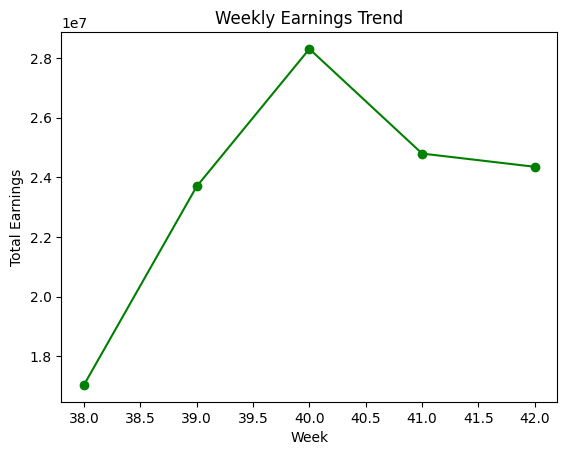

In [ ]:
weekly_earnings = df.groupby(df['Visit_Date'].dt.week)['Total_Purchases_In_USD'].sum()
weekly_earnings.plot(kind='line', marker='o', color='green')
plt.title('Weekly Earnings Trend')
plt.xlabel('Week')
plt.ylabel('Total Earnings')
plt.show()


Making a Pie Chart for the Different Categories of Customers

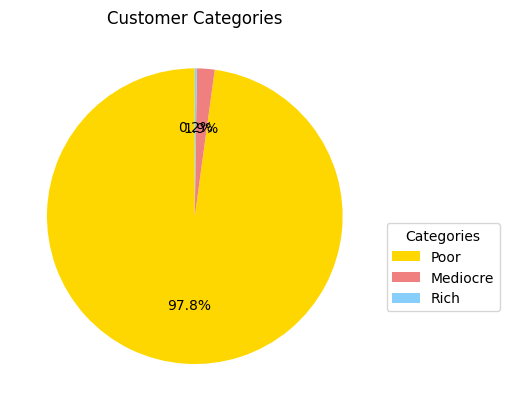

In [ ]:
category_counts = feature_set['Customer_Category'].value_counts()

# pie chart
plt.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightcoral', 'lightskyblue'])
plt.title('Customer Categories')

# legend
plt.legend(category_counts.index, loc='best', bbox_to_anchor=(1, 0.5), title='Categories')

plt.show()
